# Energy Efficiency

[Fuente de datos](https://archive.ics.uci.edu/dataset/242/energy+efficiency)
 
[Listado de repositorios tec](https://experiencia21.tec.mx/courses/530360/pages/evaluacion)


Las variables a predecir son las variables de Cooling Load y Heating Load. Ambas son variables continuas y representan la eficiencia energética de una construcción en función a una serie de variables asociadas a la construcción

**IMPORTACION DE LIBRERIAS**

In [5]:
import pandas as pd
import os 

## 1) Lecture de datos 

In [6]:
# Getting the root path 
path = os.getcwd()  # Obtiene el directorio actual
parent_path = os.path.dirname(path)  # Retrocede una carpeta
print(f"Directorio padre: {parent_path}")

Directorio padre: /Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops


In [7]:
dataset = pd.read_excel(io= parent_path + "/data/01_raw/ENB2012_data.xlsx")
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**Renaming variables**

In [8]:
dataset.rename(columns={"X1": "Relative_Compactness", 
                        "X2": "Surface_Area", 
                        "X3": "Wall_Area", 
                        "X4": "Roof_Area",
                        "X5": "Overall_Height", 
                        "X6": "Orientation", 
                        "X7": "Glazing Area", 
                        "X8": "Glazing Area Distribution", 
                        "Y1": "Heating Load", 
                        "Y2": "Cooling Load"
                       }, inplace=True)

dataset.head(n=5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## 2) Análisis exploratorio de datos 

**TAMAÑO DEL SET DE DATOS**

In [18]:
shape = dataset.shape
shape = {"Cantidad de columnas":[shape[1]], 
         "Cantidad de filas":[shape[0]]
         }

# Lo convertimos en una pandas DF 
shape = pd.DataFrame(data=shape)
shape

,Cantidad de columnas,Cantidad de filas
0,10,768


### 2.1) Análisis univariable 
En esta sección se hará análisis de manera individual a cada una de las variables

#### 2.1.1) Tipo de variables en el set de datos 

In [19]:
dataset.dtypes # Podemos observar que  la mayoría de las variables son de tipo flotante. Con excepción a 2 de tipo entero que son la de Orientation y Glazing Area Distribution. 

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

#### 2.1.2) Estadística descriptiva general 

In [20]:
dataset.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing Area Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating Load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Cooling Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


#### 2.1.3) Inspección de registros nulos 

In [21]:
dataset.isnull().sum()  # No existen valores nulos 

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

#### 2.1.4) Box plot, distribución de variables

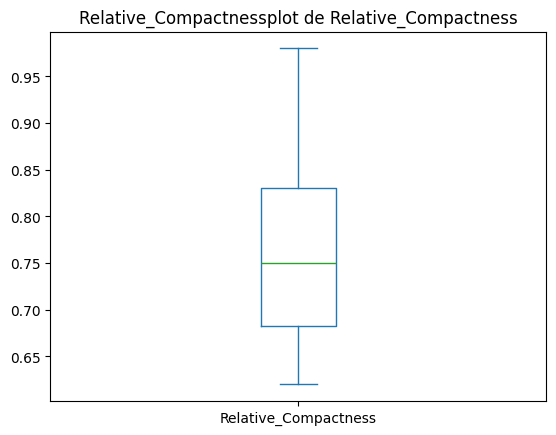

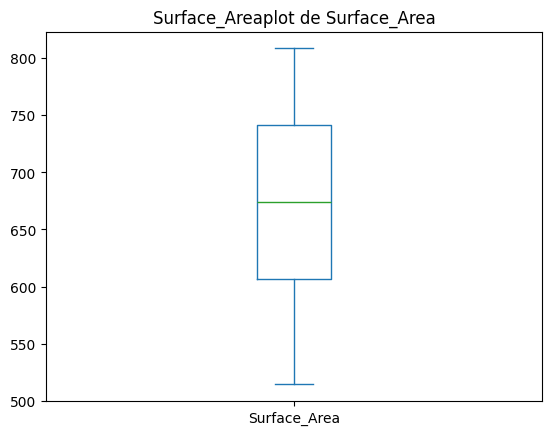

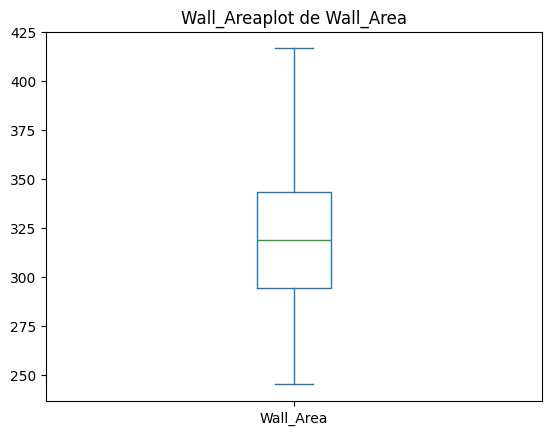

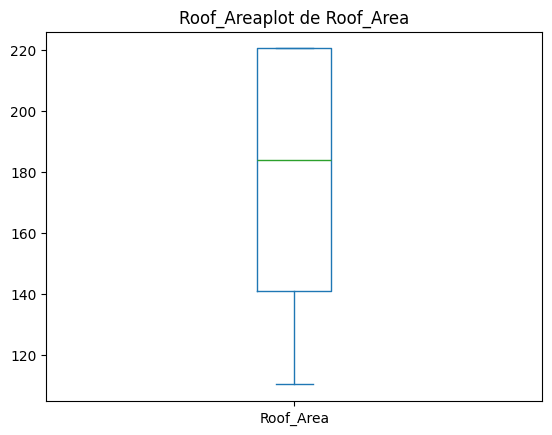

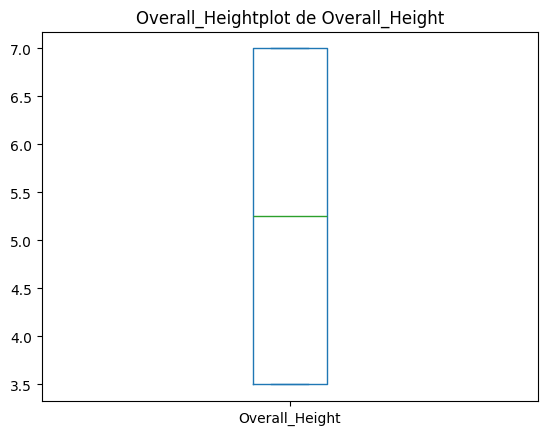

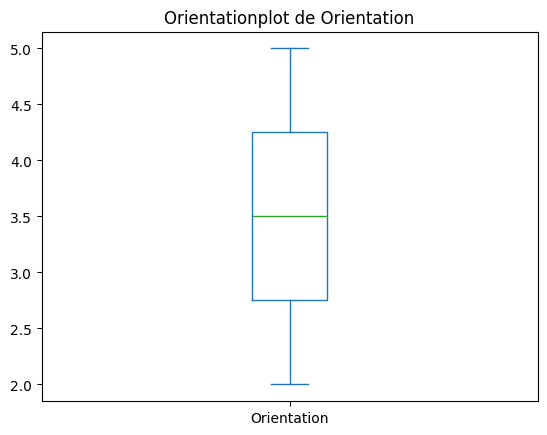

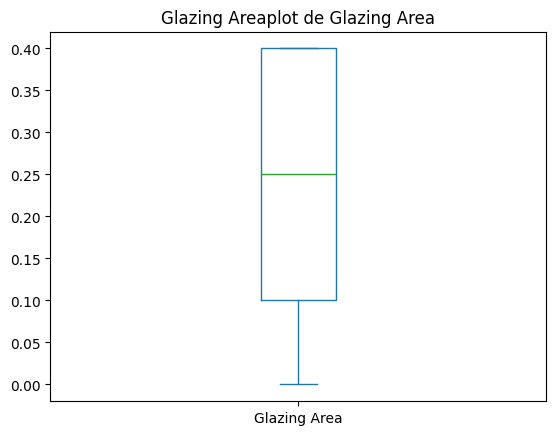

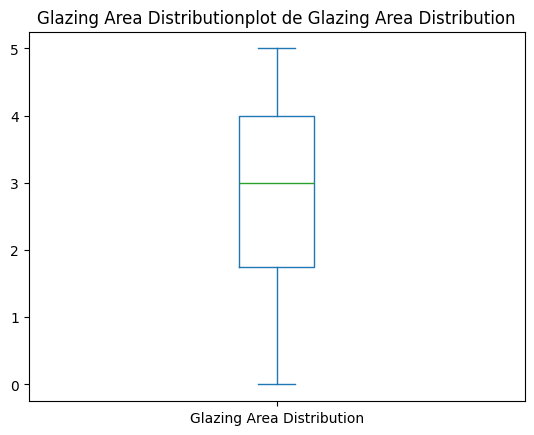

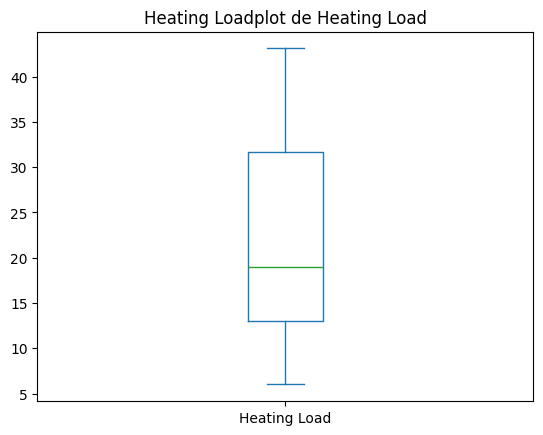

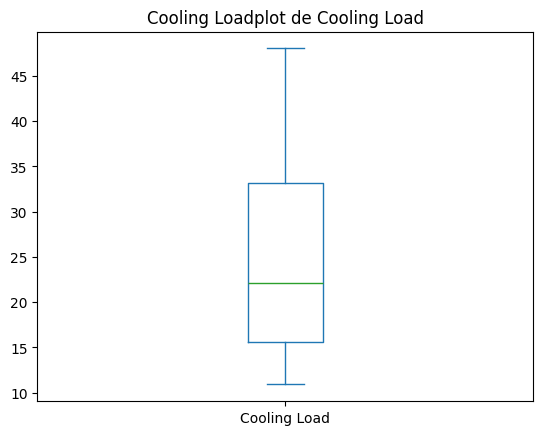

In [22]:
# 1) Definimos el nombre de las variables 
lista_columnas = list(dataset.columns)

# 2) Definimos la función donde se creará los boxplots 
def distribution_plot(dataset:pd.DataFrame, columns:list, kind:str):
    # Importación de librería necesaria
    import matplotlib.pyplot as plt

    # Inicio del ciclo de impresiones
    for i in columns:
        dataset[i].plot(kind=kind)
        plt.title(f"{i}plot de {i}")  # Agrega el título
        plt.show()  # Muestra cada gráfico de manera correcta
        
# 3) Aplicación de la función de box plot        
distribution_plot(dataset=dataset, columns=lista_columnas, kind="box")
# Agregar que se guarde cada uno de estos box plots 

#### 2.1.5) Histograma, distribución de variables 

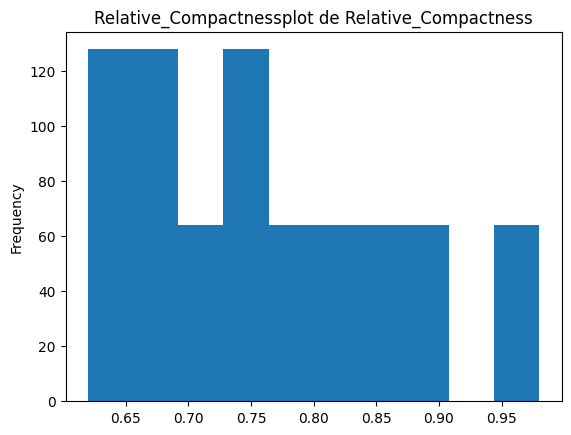

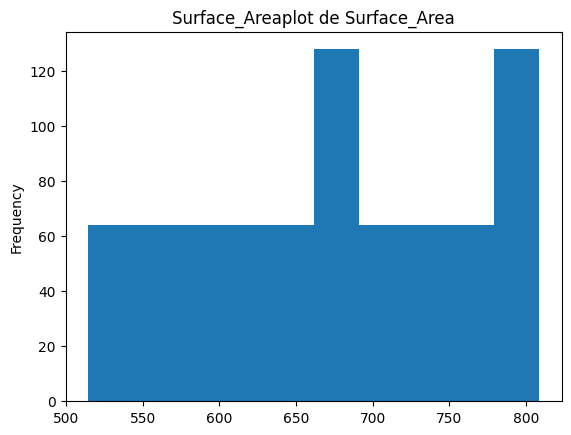

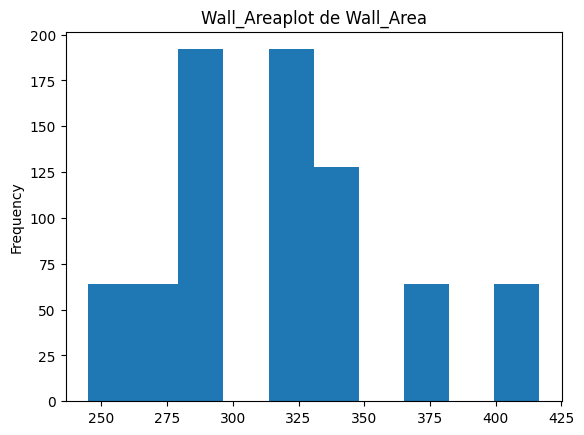

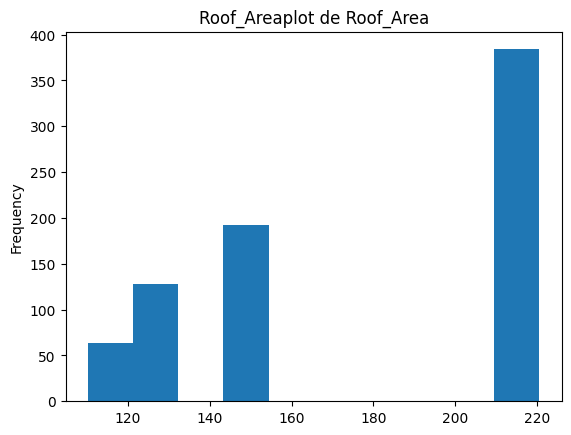

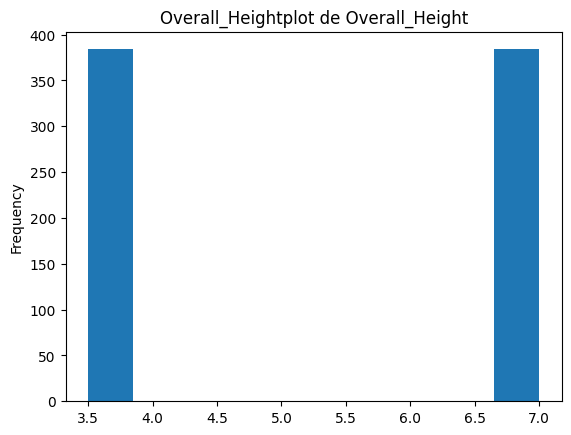

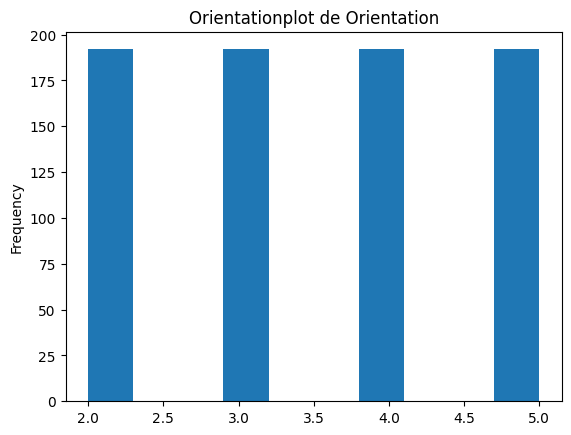

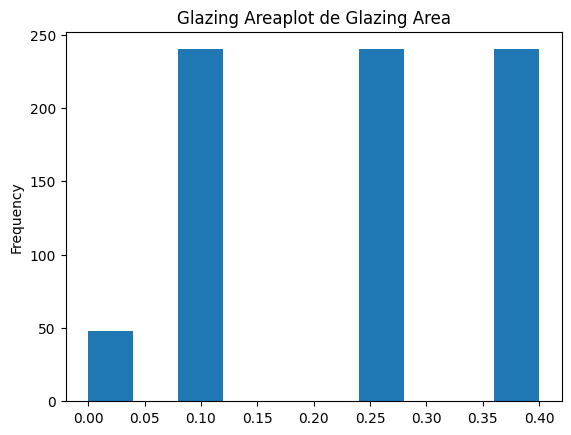

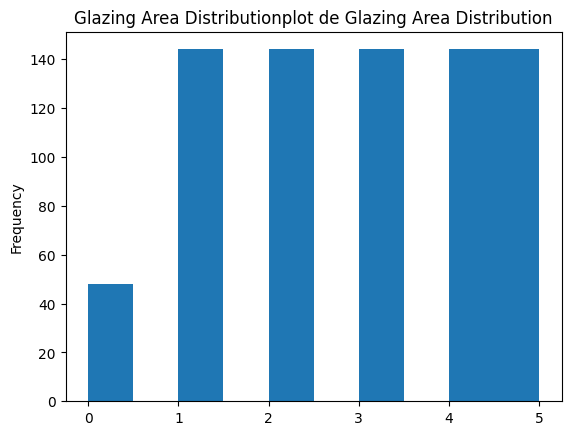

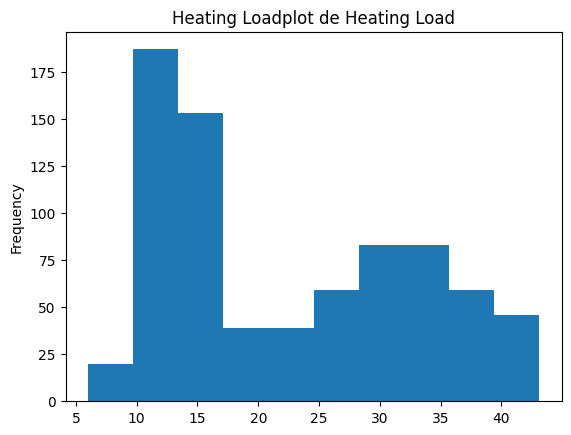

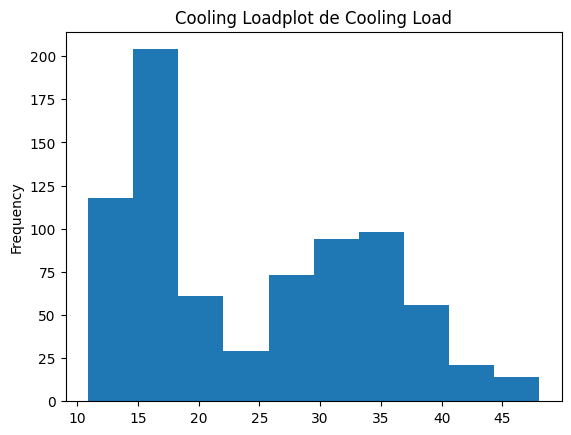

In [46]:
distribution_plot(dataset=dataset, columns=lista_columnas, kind="hist")

### 2.3) Análisis bivariante 
En esta sección se va a analizar relaciones entre 2 variables. Se hará un especial enfasis a la relación que tiene las variables objetivo con las features 

#### 2.3.1) Correlación pearson 

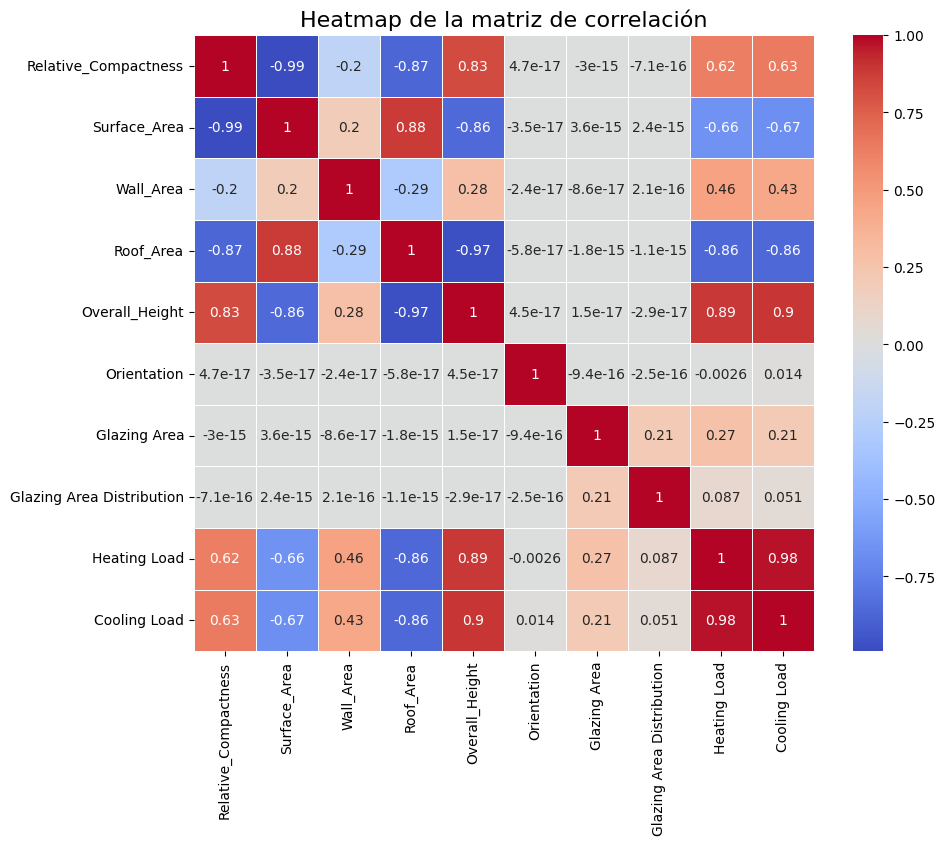

In [23]:
# 1) Definición de la función de correlación entre variables 
def heatmap (data:pd.DataFrame, method:str): 
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Calcular la matriz de correlación
    correlation_matrix = data.corr(method=method)

    # Crear el heatmap
    plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
    sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

    # Agregar un título
    plt.title("Heatmap de la matriz de correlación", fontsize=16)

    # Mostrar el gráfico
    plt.show()
    
# 2) Ejecución de la función 
heatmap(data=dataset, method="pearson")

#### 2.3.2)  Scatterplot 
Se crearán un Scatter plot entre las fueatures y las variables objetivo 

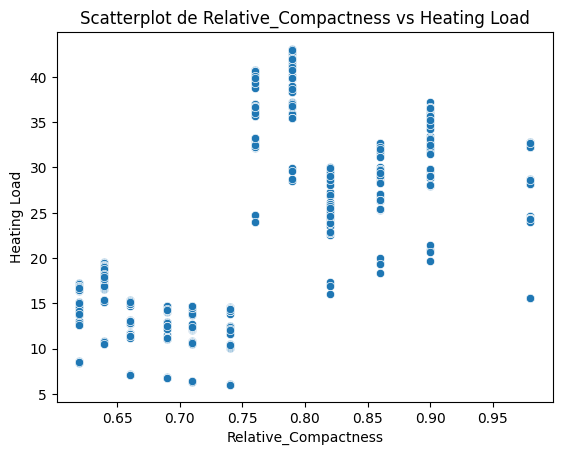

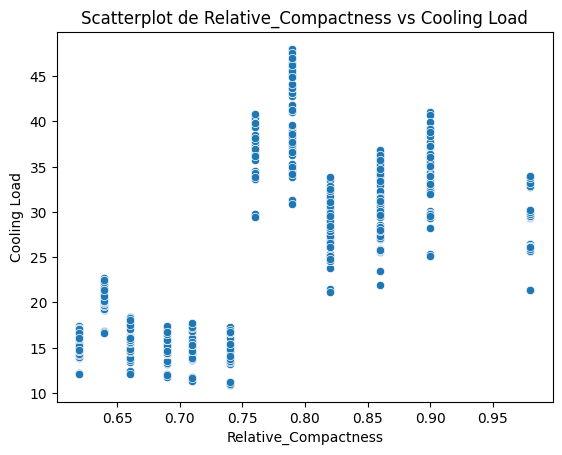

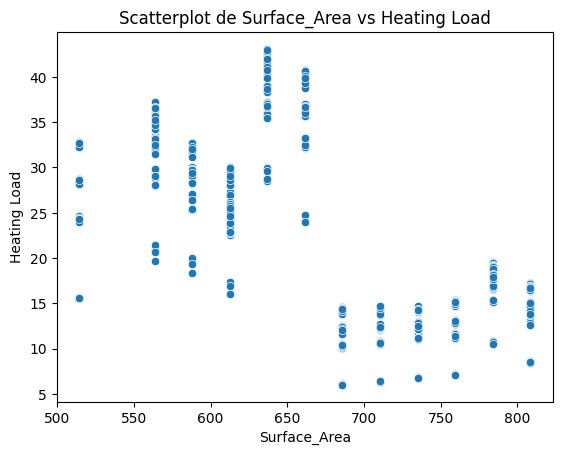

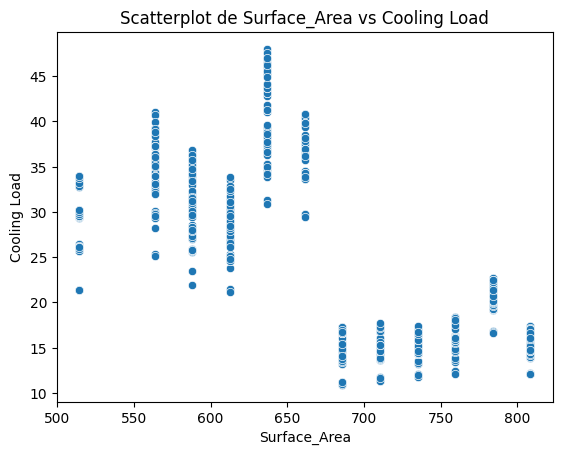

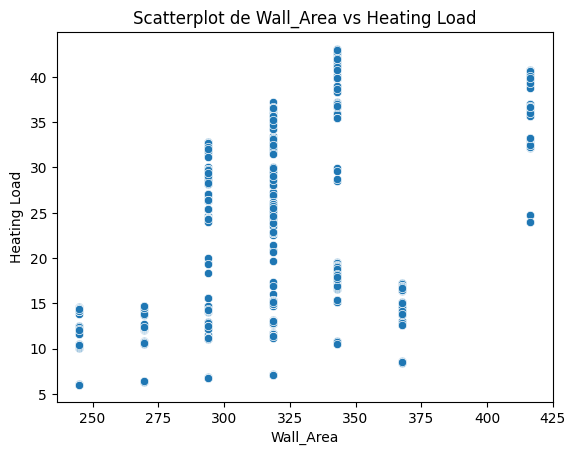

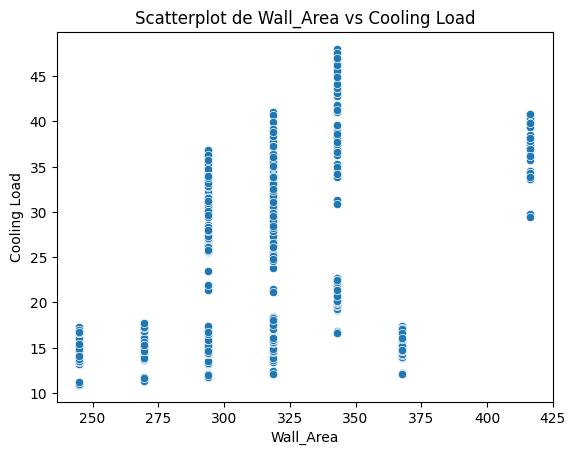

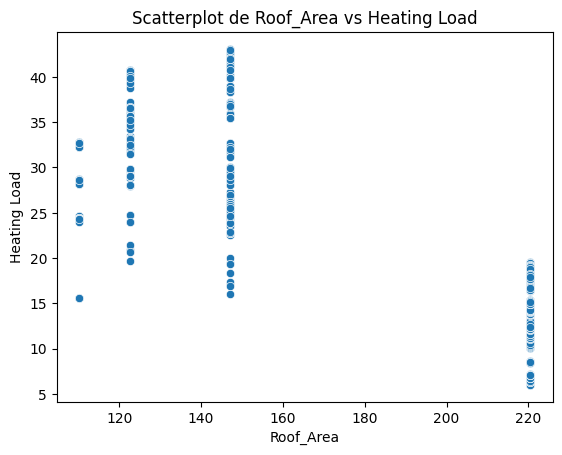

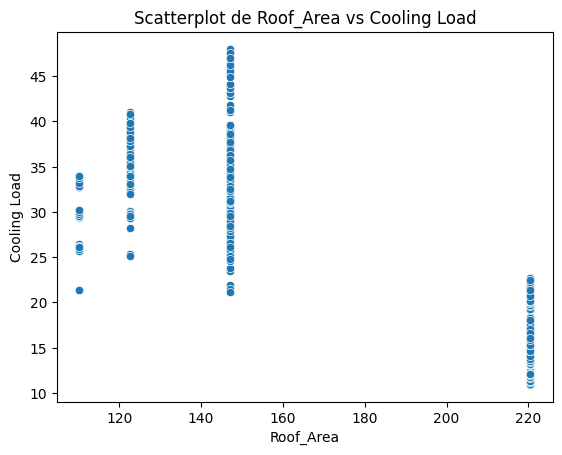

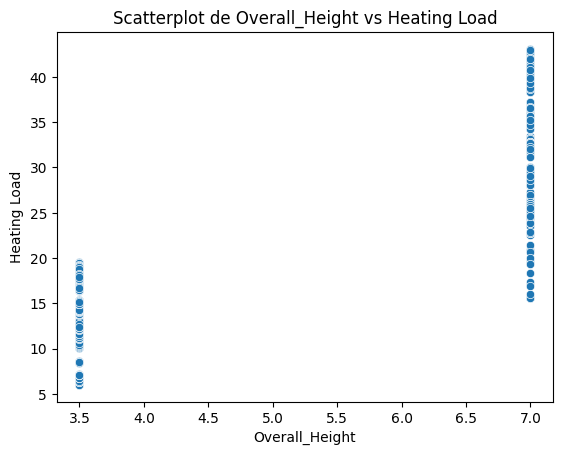

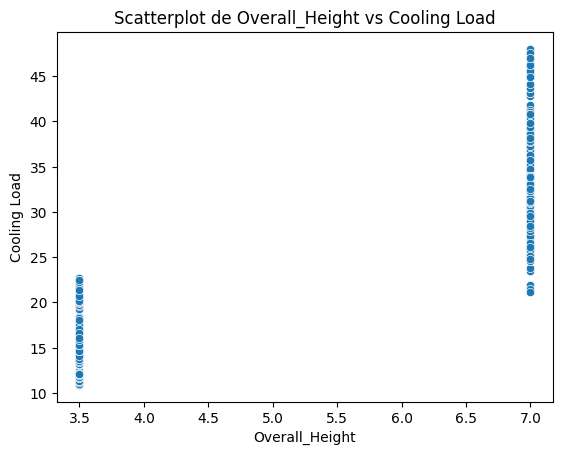

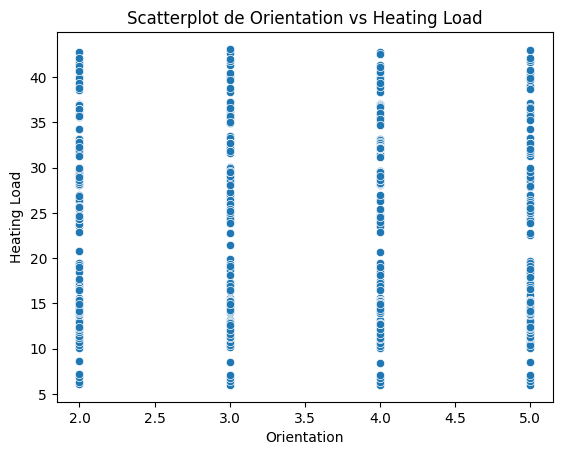

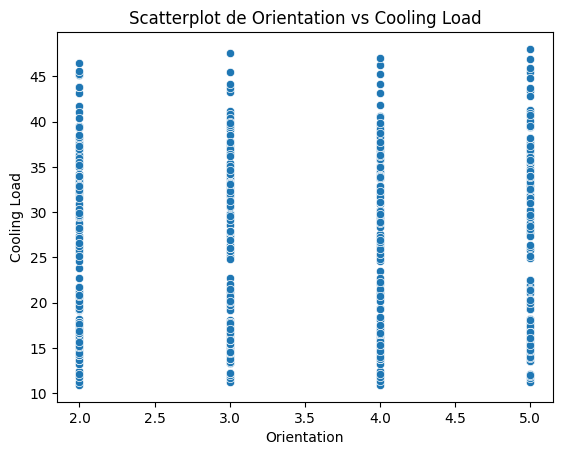

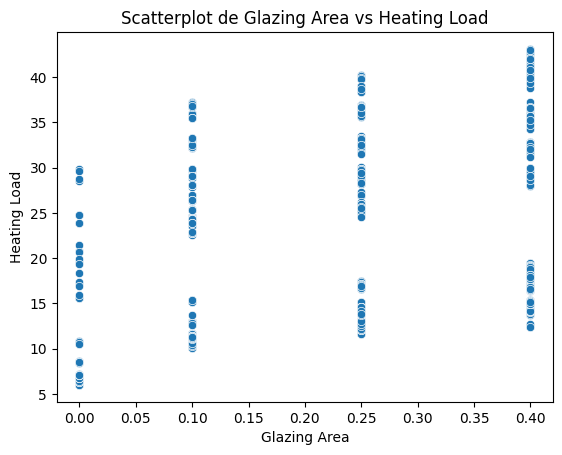

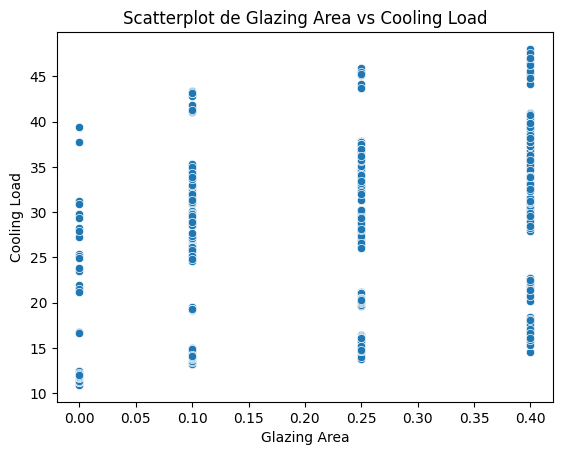

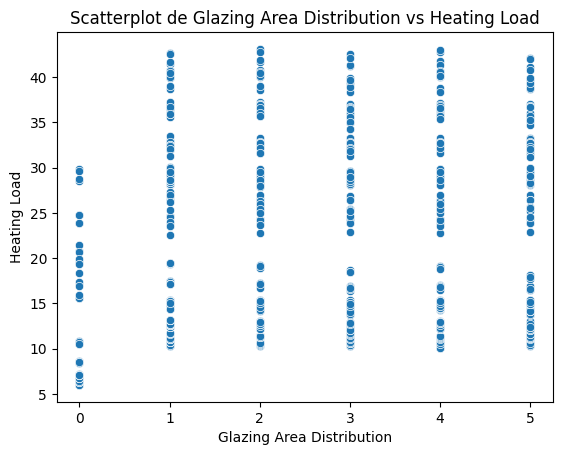

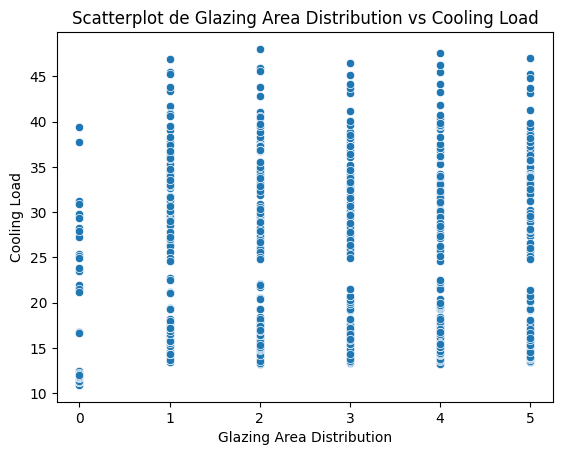

In [25]:
# 1) Creación de la función 
def scatterplot(dataset: pd.DataFrame, x: list, y:list):   
    import seaborn as sns
    import matplotlib.pyplot as plt
    for i in x:
        for w in y: 
            plt.figure()  # Crea una nueva figura para cada gráfico
            sns.scatterplot(data=dataset, x=i, y=w)
            plt.title(f"Scatterplot de {i} vs {w}")  # Agrega un título a cada gráfico
            plt.show()  # Muestra el gráfico y avanza al siguiente
        
# 2) Ejecución de la función
features_columns = list(dataset.drop(columns=["Heating Load", "Cooling Load"]).columns)
targets= ["Heating Load", "Cooling Load"]

scatterplot(dataset=dataset, x=features_columns, y=targets)

## 3) Tranformación de datos

Aspectos destacables: 
  
1) Como se pudo obervar en la etapa de EDA, existen algunas variables númericas que relamente tienen una representación categorica, por tanto es necesario sujetarlos a un proceso de encoding para poder usarlos dentro de nuestros modelos de ML.

2) Dentro de los boxplot no se logro ver ninguna dispersión que conteniera outliers extremadamente atípicos, por lo que no se planteara ningúna metodología de deteción y eliminación de outlieres 

3) No se detectaron valores nulos en el set de datos    
4) Dado que es un conjunto de datos de muy poca dimensionalidad, no se buscará realizar ningúna reducción de esta con algúna método de ML 

### 3.1) Segregación de datos 
Antes de cualquier tranformación de datos se realizara la segregación de datos (data split). Dado que es un problema de regresión se optará por usar el método de segregación aleatoria 

In [40]:
# 1) Aislamiento de los features 
features = dataset.drop(columns=["Heating Load", "Cooling Load"])

# 2) Aislamiento de las variables objetivo 
cooling_target = dataset[["Cooling Load"]]
heating_target = dataset[["Heating Load"]]

In [45]:
from sklearn.model_selection import train_test_split

# 1) Segregación para el cooling 
X_train, X_test, cooling_train, cooling_test = train_test_split(features, cooling_target, test_size=0.2, random_state=42)

# 2) Segregación para el heating 
X_train, X_test, heating_train, heating_test = train_test_split(features, heating_target, test_size=0.2, random_state=42)
X_train.head(n=5)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution
60,0.82,612.5,318.5,147.0,7.0,2,0.10,1
618,0.64,784.0,343.0,220.5,3.5,4,0.40,2
346,0.86,588.0,294.0,147.0,7.0,4,0.25,2
294,0.90,563.5,318.5,122.5,7.0,4,0.25,1
231,0.66,759.5,318.5,220.5,3.5,5,0.10,4


In [ ]:
### AQUi VOY !!! 



### 3.1) Escalamiento de variables 
Se realizará un escalamiento las fetures consideradas numéricas. Como se puede observar existen distintas escalas en el conjuto de datos numericos. En esta sección se escalaran

In [36]:
# 1) Aislamiento de variables numéricas 
numeric_features = dataset[["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area"]]


# 2) Escalamiento 
from sklearn.preprocessing import StandardScaler

# 2.1) Importamos el objeto scaler 
scaler = StandardScaler()

# 2.2) Relizamos la tranformacion 
scaled_data = scaler.fit_transform(X=numeric_features)

# 3. Convertir el array escalado en un DataFrame nuevamente, con los mismos nombres de columnas
scaled_dataset = pd.DataFrame(data=scaled_data, columns=numeric_features.columns)
scaled_dataset

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area
0,2.041777,-1.785875,-0.561951,-1.470077
1,2.041777,-1.785875,-0.561951,-1.470077
2,2.041777,-1.785875,-0.561951,-1.470077
3,2.041777,-1.785875,-0.561951,-1.470077
4,1.284979,-1.229239,0.000000,-1.198678
...,...,...,...,...
763,-1.174613,1.275625,0.561951,0.972512
764,-1.363812,1.553943,1.123903,0.972512
765,-1.363812,1.553943,1.123903,0.972512
766,-1.363812,1.553943,1.123903,0.972512


In [28]:
dataset[""]

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### 3.1) Encoding 
Encoding de variables categoricas 

In [33]:
# 1) Asilamiento de variables categoricas 
categorical_variables = dataset.drop(columns=numeric_features.columns.to_list()) # Eliminacion de variables numericas 
categorical_variables.drop(columns=["Heating Load","Cooling Load"], inplace=True) # Eliminacion de variables objetivo 
categorical_variables

,Overall_Height,Orientation,Glazing Area,Glazing Area Distribution
0,7.0,2,0.0,0
1,7.0,3,0.0,0
2,7.0,4,0.0,0
3,7.0,5,0.0,0
4,7.0,2,0.0,0
...,...,...,...,...
763,3.5,5,0.4,5
764,3.5,2,0.4,5
765,3.5,3,0.4,5
766,3.5,4,0.4,5


In [ ]:
## AQUI !!


In [31]:
numeric_features.columns.to_list()

['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area']